In [ ]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier


In [ ]:
#load dataset
DATA_PATH = 'Alphabets_data.csv'
df = pd.read_csv(DATA_PATH)
print('Shape:', df.shape)
df.head()

Dataset loaded from Alphabets_data.csv
Shape: (20000, 17)


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


In [ ]:
#find missing value
df.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder   # LabelEncoder import

encoder = LabelEncoder()   # Encoder object create

df['letter_encoded'] = encoder.fit_transform(df['letter'])  # 'letter' ko numbers me convert karke naya column banaya

print(df[['letter', 'letter_encoded']].head())  # First 5 rows print


In [7]:

df = df.drop(columns=['letter'])

print(df.head())


   xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  x2ybar  \
0     2     8      3       5      1     8    13      0      6      6      10   
1     5    12      3       7      2    10     5      5      4     13       3   
2     4    11      6       8      6    10     6      2      6     10       3   
3     7    11      6       6      3     5     9      4      6      4       4   
4     2     1      3       1      1     8     6      6      6      6       5   

   xy2bar  xedge  xedgey  yedge  yedgex  letter_encoded  
0       8      0       8      0       8              19  
1       9      2       8      4      10               8  
2       7      3       7      3       9               3  
3      10      6      10      2       8              13  
4       9      1       7      5      10               6  


In [ ]:
label_col = None   # Variable to store the label column name

# Check common label column names and pick the first match
for cand in ['label', 'Label', 'class', 'Class', 'target', 'Target']:
    if cand in df.columns:
        label_col = cand
        break

# If no common name found, take the last column as label
if label_col is None:
    last = df.columns[-1]
    label_col = last

print('Chosen label column:', label_col)   # Print the chosen label column
print(df[label_col].value_counts())        # Print class distribution in label column


Chosen label column: letter_encoded
letter_encoded
20    813
3     805
15    803
19    796
12    792
0     789
23    787
24    786
13    783
16    783
5     775
6     773
4     768
1     766
21    764
11    761
17    758
8     755
14    753
22    752
18    748
9     747
10    739
2     736
7     734
25    734
Name: count, dtype: int64


In [ ]:
#selecting target colunm and features colunm
X = df.drop(columns=[label_col])
y = df[label_col].copy()

In [ ]:
# Encode target variable if categorical or categorical-like numeric
if y.dtype == 'object' or y.dtype.name == 'category':
    le = LabelEncoder()
    y_enc = le.fit_transform(y)
    print('Classes:', list(le.classes_))
else:
    try:
        unique_ratio = len(np.unique(y)) / len(y)
        if unique_ratio < 0.1 and len(np.unique(y)) < 50:
            le = LabelEncoder()
            y_enc = le.fit_transform(y)
            print('Encoded numeric labels. Classes:', np.unique(y_enc))
        else:
            y_enc = y.values
            le = None
    except Exception:
        y_enc = y.values
        le = None

# Handle missing values (numeric → median, categorical → mode)
for c in X.columns:
    if X[c].dtype.kind in 'biufc':
        if X[c].isna().sum()>0:
            X[c] = X[c].fillna(X[c].median())
    else:
        if X[c].isna().sum()>0:
            X[c] = X[c].fillna(X[c].mode().iloc[0])

# Standardize features for model training
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final processed features and labels
X_final = X_scaled
y_final = y_enc

print('X_final shape:', X_final.shape)   # Final feature matrix shape
print('y_final shape:', y_final.shape)   # Final label vector shape


Encoded numeric labels. Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
X_final shape: (20000, 16)
y_final shape: (20000,)


In [ ]:
#train_test_split for training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (16000, 16) Test shape: (4000, 16)


In [ ]:
# Get number of features and number of classes from training data
num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))
print('Num features:', num_features, 'Num classes:', num_classes)

# Function to create a baseline neural network model
def create_baseline_model():
    model = Sequential()
    model.add(Dense(64, input_dim=num_features, activation='relu'))   # First hidden layer
    model.add(Dense(32, activation='relu'))                           # Second hidden layer
    
    # Output layer depends on classification type
    if num_classes > 2:
        model.add(Dense(num_classes, activation='softmax'))           # Multi-class classification
        loss = 'sparse_categorical_crossentropy'
    else:
        model.add(Dense(1, activation='sigmoid'))                     # Binary classification
        loss = 'binary_crossentropy'
    
    # Compile model with Adam optimizer and accuracy metric
    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    return model

# Build and summarize the baseline model
baseline = create_baseline_model()
baseline.summary()


Num features: 16 Num classes: 26


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the baseline model (20 epochs, batch size 32, with 10% validation split)
history_baseline = baseline.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=2)

# Evaluate the trained model on test data
baseline_eval = baseline.evaluate(X_test, y_test, verbose=0)

# Print test loss and accuracy
print('Baseline test loss, test accuracy:', baseline_eval)


Epoch 1/20
450/450 - 2s - 4ms/step - accuracy: 0.5019 - loss: 1.8432 - val_accuracy: 0.6981 - val_loss: 1.0829
Epoch 2/20
450/450 - 1s - 2ms/step - accuracy: 0.7369 - loss: 0.9125 - val_accuracy: 0.7688 - val_loss: 0.7963
Epoch 3/20
450/450 - 1s - 2ms/step - accuracy: 0.7917 - loss: 0.7147 - val_accuracy: 0.8112 - val_loss: 0.6568
Epoch 4/20
450/450 - 1s - 2ms/step - accuracy: 0.8229 - loss: 0.6078 - val_accuracy: 0.8369 - val_loss: 0.5754
Epoch 5/20
450/450 - 1s - 2ms/step - accuracy: 0.8457 - loss: 0.5328 - val_accuracy: 0.8581 - val_loss: 0.5166
Epoch 6/20
450/450 - 1s - 2ms/step - accuracy: 0.8633 - loss: 0.4758 - val_accuracy: 0.8719 - val_loss: 0.4684
Epoch 7/20
450/450 - 1s - 2ms/step - accuracy: 0.8739 - loss: 0.4309 - val_accuracy: 0.8750 - val_loss: 0.4424
Epoch 8/20
450/450 - 1s - 2ms/step - accuracy: 0.8869 - loss: 0.3946 - val_accuracy: 0.8938 - val_loss: 0.4105
Epoch 9/20
450/450 - 1s - 2ms/step - accuracy: 0.8962 - loss: 0.3625 - val_accuracy: 0.8888 - val_loss: 0.3863
E

In [ ]:
# Generate predictions based on classification type
if num_classes > 2:
    y_pred_probs = baseline.predict(X_test)              # Probabilities for multi-class
    y_pred = np.argmax(y_pred_probs, axis=1)             # Pick class with highest probability
else:
    y_pred_probs = baseline.predict(X_test).ravel()      # Probabilities for binary class
    y_pred = (y_pred_probs > 0.5).astype(int)            # Convert to 0/1 predictions

# Evaluate predictions with accuracy, classification report, and confusion matrix
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification report:')
print(classification_report(y_test, y_pred))
print('\nConfusion matrix:')
print(confusion_matrix(y_test, y_pred))


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9255

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       158
           1       0.88      0.88      0.88       153
           2       0.89      0.97      0.93       147
           3       0.89      0.93      0.91       161
           4       0.90      0.92      0.91       154
           5       0.91      0.88      0.90       155
           6       0.89      0.92      0.91       155
           7       0.84      0.88      0.86       147
           8       0.98      0.88      0.93       151
           9       0.94      0.95      0.95       149
          10       0.94      0.88      0.91       148
          11       0.94      0.94      0.94       152
          12       0.96      0.96      0.96       158
          13       0.97      0.88      0.92       157
          14       0.94      0.91      0.93       150
          15       0.92      0.92      0.92       161

In [15]:

# Features and classes
num_features = X_train.shape[1]
num_classes = len(set(y_train))

# Build model function
def build_model(units1=64, units2=32, activation='relu', dropout_rate=0.0, lr=0.001):
    model = Sequential()
    model.add(Dense(units1, input_dim=num_features, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units2, activation=activation))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    if num_classes > 2:
        model.add(Dense(num_classes, activation='softmax'))
        loss = 'sparse_categorical_crossentropy'
    else:
        model.add(Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

# Wrap in KerasClassifier (scikeras)
keras_clf = KerasClassifier(model=build_model, epochs=30, batch_size=32, verbose=0)

# Hyperparameter space
param_dist = {
    "model__units1": [32, 64, 128],
    "model__units2": [16, 32, 64],
    "model__activation": ["relu", "tanh"],
    "model__dropout_rate": [0.0, 0.2, 0.4],
    "model__lr": [1e-3, 5e-4, 1e-4],
    "batch_size": [16, 32],
    "epochs": [20, 30]
}

# Randomized search
rs = RandomizedSearchCV(
    keras_clf,
    param_distributions=param_dist,
    n_iter=8,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1
)

print("Starting randomized search (this may take time)...")
rs_result = rs.fit(X_train, y_train)
print("Best params:", rs_result.best_params_)
print("Best CV score:", rs_result.best_score_)


Starting randomized search (this may take time)...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.4, model__lr=0.0005, model__units1=64, model__units2=64; total time=  24.9s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.4, model__lr=0.0005, model__units1=64, model__units2=64; total time=  52.2s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.4, model__lr=0.0005, model__units1=64, model__units2=64; total time=  39.4s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.4, model__lr=0.001, model__units1=64, model__units2=32; total time= 1.8min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.4, model__lr=0.001, model__units1=64, model__units2=32; total time= 2.5min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.4, model__lr=0.001, model__units1=64, model__units2=32; total time= 2.4min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=64; total time= 1.4min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=64; total time= 1.3min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=30, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=64; total time= 1.4min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=16; total time=  47.8s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=16; total time=  55.2s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.0, model__lr=0.0001, model__units1=128, model__units2=16; total time=  52.7s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=relu, model__dropout_rate=0.4, model__lr=0.0001, model__units1=32, model__units2=16; total time= 1.4min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=relu, model__dropout_rate=0.4, model__lr=0.0001, model__units1=32, model__units2=16; total time= 1.7min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=relu, model__dropout_rate=0.4, model__lr=0.0001, model__units1=32, model__units2=16; total time= 1.6min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0005, model__units1=128, model__units2=32; total time=  55.5s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0005, model__units1=128, model__units2=32; total time=  53.3s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0005, model__units1=128, model__units2=32; total time=  52.3s


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.0, model__lr=0.0001, model__units1=32, model__units2=32; total time= 2.5min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.0, model__lr=0.0001, model__units1=32, model__units2=32; total time= 2.4min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=30, model__activation=relu, model__dropout_rate=0.0, model__lr=0.0001, model__units1=32, model__units2=32; total time= 2.6min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0001, model__units1=64, model__units2=64; total time= 1.7min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0001, model__units1=64, model__units2=64; total time= 1.8min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=20, model__activation=tanh, model__dropout_rate=0.2, model__lr=0.0001, model__units1=64, model__units2=64; total time= 1.8min


c:\Users\mohds\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best params: {'model__units2': 64, 'model__units1': 128, 'model__lr': 0.0001, 'model__dropout_rate': 0.0, 'model__activation': 'tanh', 'epochs': 30, 'batch_size': 32}
Best CV score: 0.8207499517276259


In [16]:
best_model = rs_result.best_estimator_.model
try:
    test_eval = best_model.evaluate(X_test, y_test, verbose=0)
    print('Tuned model test loss, test accuracy:', test_eval)
except Exception as e:
    print('Could not directly evaluate model from wrapper; will re-build and set weights. Error:', e)

# Predictions
# KerasClassifier.predict returns class labels for classification


Could not directly evaluate model from wrapper; will re-build and set weights. Error: 'function' object has no attribute 'evaluate'


In [17]:
y_pred_tuned = rs_result.best_estimator_.predict(X_test)
print('Tuned model accuracy:', accuracy_score(y_test, y_pred_tuned))
print('\nTuned model classification report:')
print(classification_report(y_test, y_pred_tuned))
print('\nTuned model confusion matrix:')
print(confusion_matrix(y_test, y_pred_tuned))

Tuned model accuracy: 0.84275

Tuned model classification report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       158
           1       0.76      0.81      0.78       153
           2       0.92      0.88      0.90       147
           3       0.83      0.89      0.86       161
           4       0.78      0.84      0.81       154
           5       0.78      0.79      0.79       155
           6       0.78      0.75      0.77       155
           7       0.81      0.66      0.73       147
           8       0.95      0.81      0.87       151
           9       0.88      0.87      0.88       149
          10       0.78      0.82      0.80       148
          11       0.88      0.88      0.88       152
          12       0.90      0.92      0.91       158
          13       0.89      0.85      0.87       157
          14       0.80      0.84      0.82       150
          15       0.94      0.86      0.90       161
          16   

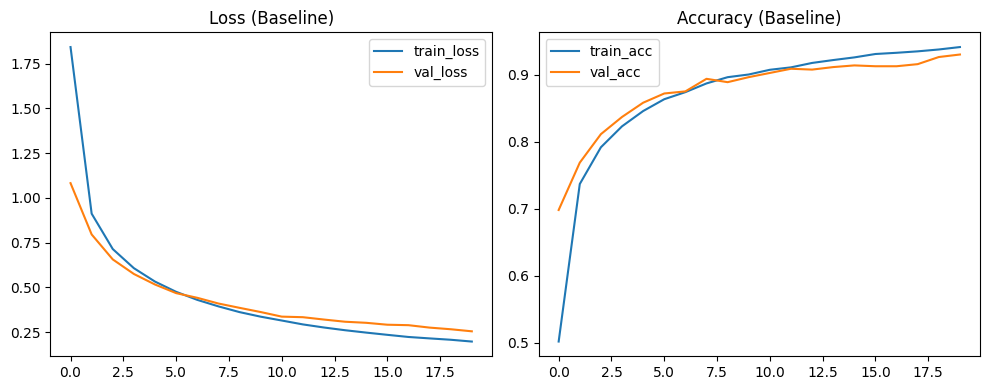

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history_baseline.history['loss'], label='train_loss')
plt.plot(history_baseline.history['val_loss'], label='val_loss')
plt.title('Loss (Baseline)'); plt.legend()
plt.subplot(1,2,2)
plt.plot(history_baseline.history['accuracy'], label='train_acc')
plt.plot(history_baseline.history['val_accuracy'], label='val_acc')
plt.title('Accuracy (Baseline)'); plt.legend()
plt.tight_layout()
plt.show()

## Next steps and tips

- If classes are highly imbalanced, consider class weights or oversampling.
- Increase `n_iter` in RandomizedSearchCV or use GridSearchCV for exhaustive search.
- Try callbacks like EarlyStopping and ReduceLROnPlateau to speed training and improve results.

This notebook is ready to run as-is.